We need to evaluate features we can try and improve and restore for photos, this includes - 
    - Blurriness
    - Blemishes
    - Colour Faded/Low Saturations, etc

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Sharpening Photos 

In [57]:
photo = cv2.imread('sample-photos/old_photo_01.jpg')

k = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]],dtype=float)
k = k / k.sum()
sharp = cv2.filter2D(photo, -1, k)

cv2.imshow('Original Image', photo)
cv2.imshow('Sharp Photo', sharp)

key = cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

Increasing brightness if brightness is below a certain threshold

In [59]:
grey = cv2.cvtColor(sharp, cv2.COLOR_BGR2GRAY)

brightness = np.mean(grey) #mean to get brightness
brightened = sharp

# if image has low brightness
if brightness < 100:
    gamma = 1.5
    brightened = np.power(sharp / 255.0, 1 / gamma)
    brightened = np.uint8(brightened * 255)

# showing all for testing purposes
cv2.imshow('Original Image', photo)
cv2.imshow('Sharp Photo', sharp)
cv2.imshow('Brightened Image', brightened)
key = cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

thresholding or masking

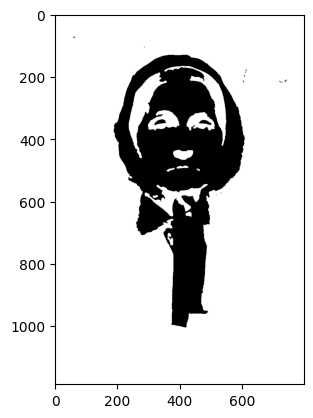

In [43]:
hsv = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

_, thresh = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

mask_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_open)
plt.imshow(mask_open, cmap='gray')

